In [64]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np



#Transforming the dataset

In [65]:
transform_image=transforms.Compose(
    [
    torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.1,2)),
    torchvision.transforms.RandomRotation(10),
    torchvision.transforms.ToTensor()
    ]
    )

#Setting up Train and Test Dataset

In [66]:
train_data= torchvision.datasets.CIFAR10(root="data",
                                              train=True,
                                              download=True,
                                              transform=transform_image,
                                              target_transform=None
                                              )
test_data= torchvision.datasets.CIFAR10(root="data",
                                              train=False,
                                              download=True,
                                              transform=transform_image,
                                              target_transform=None
                                              )

Files already downloaded and verified
Files already downloaded and verified


#DataLoader and minibatches

In [67]:
# dataset_full = torchvision.datasets.FashionMNIST(data_folder, train = True, download = True, transform = transforms.ToTensor())
# # Selecting classes 7, 2, 5 and 6
# idx = (dataset_full.targets==7) | (dataset_full.targets==2) | (dataset_full.targets==5) | (dataset_full.targets==6)
# dataset_full.targets = dataset_full.targets[idx]
# dataset_full.data = dataset_full.data[idx]

In [68]:
# Selecting classes 0, 2, 4,6 and 8 in train data
idx0 = torch.tensor(train_data.targets) == 0
idx2 = torch.tensor(train_data.targets) == 2
idx4 = torch.tensor(train_data.targets) == 4
idx6 = torch.tensor(train_data.targets) == 6
idx8 = torch.tensor(train_data.targets) == 8

train_mask= idx0 | idx2 | idx4 | idx6 | idx8
train_indices = train_mask.nonzero().reshape(-1) #a list of indices which has true for either 0, 2, 4,6 or 8

from torch.utils.data import Subset
train_subset = Subset(train_data, train_indices)  # make a subset

from torch.utils.data import DataLoader
train_data = DataLoader(train_subset, shuffle=False, batch_size=32)


In [69]:
# Selecting classes 0, 2, 4,6 and 8 in test data
idx0 = torch.tensor(test_data.targets) == 0
idx2 = torch.tensor(test_data.targets) == 2
idx4 = torch.tensor(test_data.targets) == 4
idx6 = torch.tensor(test_data.targets) == 6
idx8 = torch.tensor(test_data.targets) == 8

test_mask= idx0 | idx2 | idx4 | idx6 | idx8
test_indices = test_mask.nonzero().reshape(-1) #a list of indices which has true for either 0, 2, 4,6 or 8

from torch.utils.data import Subset
test_subset = Subset(test_data, test_indices)  # make a subset

from torch.utils.data import DataLoader
test_data = DataLoader(test_subset, shuffle=False, batch_size=32)


In [70]:
for image, label in test_data:
  print(image.shape)
  break


torch.Size([32, 3, 32, 32])


In [71]:
len(train_data), len(test_data)

(782, 157)

In [72]:
image,label = next(iter(train_data))

In [73]:
image.shape,label

(torch.Size([32, 3, 32, 32]),
 tensor([6, 4, 2, 8, 4, 2, 2, 6, 4, 6, 6, 2, 6, 4, 0, 0, 4, 0, 2, 2, 2, 2, 0, 2,
         2, 2, 4, 8, 2, 4, 8, 6]))

tensor([6, 4, 2, 8, 4, 2, 2, 6, 4, 6, 6, 2, 6, 4, 0, 0, 4, 0, 2, 2, 2, 2, 0, 2,
        2, 2, 4, 8, 2, 4, 8, 6])


torch.Size([32, 3, 32, 32])

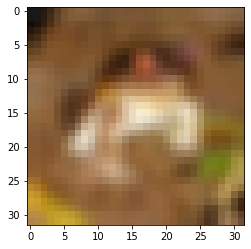

In [74]:
print(label)
#image.resize(32,32,3)
plt.imshow(image[0].permute(1, 2, 0))
image.shape

In [75]:
class_names= train_data.dataset.dataset.classes  #the class_names is a list containing the names of all classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [76]:
#Converting the class names to class indexes so that we can use it later
class_to_idx= train_data.dataset.dataset.class_to_idx
class_to_idx 

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

# Dataloader and miniBatches

In [77]:
# batch_size= 32
# train_dataloader= DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
# test_dataloader= DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

In [78]:
len(train_data)

782

In [79]:
len(test_data)

157

#Setting up the device

In [80]:
#setup device agnoistic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

#Model Building

In [81]:
class CIFARModel(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_lay_1=nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
    self.relu_lay_1=nn.ReLU()
    self.conv_lay_2=nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
    self.relu_lay_2=nn.ReLU()
    self.conv_lay_3=nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
    self.relu_lay_3 =nn.ReLU()
    self.conv_lay_4=nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
    self.relu_lay_4=nn.ReLU()
    self.conv_lay_5=nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
    self.relu_lay_5=nn.ReLU()
    self.conv_lay_6=nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
    self.relu_lay_6=nn.ReLU()
    self.max_lay_1=nn.MaxPool2d(kernel_size=2)
    
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=12*16*16,
                  out_features=1024),
        nn.ReLU(),
        nn.Linear(in_features=1024,
                  out_features=5)
    )
  def forward(self,x):
    x= self.conv_lay_1(x)
    x=self.relu_lay_1(x)
    x= self.conv_lay_2(x)
    x=self.relu_lay_2(x)
    x= self.conv_lay_3(x)
    x=self.relu_lay_3(x)
    x= self.conv_lay_4(x)
    x=self.relu_lay_4(x)
    x= self.conv_lay_5(x)
    x=self.relu_lay_5(x)
    x= self.conv_lay_6(x)
    x=self.relu_lay_6(x)
    x=self.max_lay_1(x)
    #print(f"shape of conv_block_6{x.shape}")
    x=self.classifier(x)
    return x

In [82]:
torch.manual_seed(42)
model_0= CIFARModel(input_shape=3,
                    hidden_units=12,
                    output_shape= len(class_names)).to(device)

#Loss function and Accuracy function


In [83]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [84]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr=0.1)

In [85]:
# #Weight Initialization
torch.nn.init.kaiming_uniform_(model_0.conv_lay_1.weight).to(device)
torch.nn.init.kaiming_uniform_(model_0.conv_lay_2.weight).to(device)
torch.nn.init.kaiming_uniform_(model_0.conv_lay_3.weight).to(device)
torch.nn.init.kaiming_uniform_(model_0.conv_lay_4.weight).to(device)
torch.nn.init.kaiming_uniform_(model_0.conv_lay_5.weight).to(device)
torch.nn.init.kaiming_uniform_(model_0.conv_lay_6.weight).to(device)


Parameter containing:
tensor([[[[-0.0554, -0.0422,  0.0270],
          [-0.1697, -0.1974,  0.1127],
          [ 0.1872, -0.0519,  0.0649]],

         [[-0.0158,  0.0702, -0.2332],
          [-0.1918, -0.1290,  0.1313],
          [ 0.2075, -0.1852, -0.0577]],

         [[ 0.0709, -0.1869, -0.2317],
          [-0.1342, -0.2236, -0.2277],
          [-0.0687,  0.0731,  0.1947]],

         ...,

         [[-0.1370, -0.1872, -0.0680],
          [-0.0038, -0.2026,  0.0158],
          [-0.0787,  0.0336, -0.0622]],

         [[-0.1944,  0.0358,  0.1159],
          [-0.0213,  0.0874, -0.2234],
          [-0.0056,  0.0402, -0.0502]],

         [[ 0.0405, -0.1648, -0.1822],
          [-0.0145,  0.0595,  0.1907],
          [ 0.0456,  0.1056,  0.1479]]],


        [[[-0.1675,  0.1165, -0.1636],
          [-0.0517,  0.0679, -0.2027],
          [ 0.0797, -0.2212,  0.1589]],

         [[ 0.1172,  0.1401,  0.1179],
          [ 0.1037,  0.1597,  0.1226],
          [ 0.1601,  0.1751,  0.0403]],

         

#Training the Model

In [88]:
#set the number of epochs( we will kep this small for faster trainin time)
epochs = 3

#Create training and test loop
for epoch in range(epochs):
  print(f"Epoch:{epoch} \n-------")
  ## Training
  train_loss=0
  #Add a loop to loop through the training batches
  for batch, (X ,y) in enumerate(train_data):#X is image and y is label
     model_0.train()

     #1. Forward Pass
     y_pred = model_0(X)

     y = y // 2
     #2. claculate the loss
     loss= loss_fn(y_pred,y)
     train_loss += loss  #acculumate train loss

     #3.Optimizer zero grad
     optimizer.zero_grad()

     #4.Loss backward
     loss.backward()

     #5.optimizer Step
     optimizer.step()

     #print out whats happening
     if batch % 400 ==0:
       print(f"Looked at {batch* len(X)}/ {len(train_data.dataset)} samples.")
  
  ##Divide total train loss by length of train dataloader
  train_loss /= len(train_data)

  ##Testing
  test_loss, test_acc= 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_data:
      #1.Forward pass
      test_pred = model_0(X)
      y = y//2
      #2. Calculate loss(accumulatively)
      test_loss += loss_fn(test_pred, y)

      #3. calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    #Calculate the test loss average per batch
    test_loss /= len(test_data)
    #Calculate the test acc average per batch
    test_acc/= len(test_data) 

  #print out whats happening
  print(f"\n train loss: {train_loss:.4f} | Test loss:{test_loss:.4f} | test accuracy:{test_acc:.4f}")

Epoch:0 
-------
Looked at 0/ 25000 samples.
Looked at 12800/ 25000 samples.

 train loss: 1.1517 | Test loss:1.2113 | test accuracy:45.5414
Epoch:1 
-------
Looked at 0/ 25000 samples.
Looked at 12800/ 25000 samples.

 train loss: 1.0436 | Test loss:1.2003 | test accuracy:52.8463
Epoch:2 
-------
Looked at 0/ 25000 samples.
Looked at 12800/ 25000 samples.

 train loss: 0.9398 | Test loss:1.1098 | test accuracy:54.6576
